# Fénysebesség mérése

## 1. feladat: Ismerkedés a mérési elrendezéssel  - 1 pont

Állítsa össze a mérést, ellenőrizze, hogy a fényorrás és a detektor a műszerekhez megfelelően vannak bekötve, ha a jelalak a visszaverődések miatt torz, használjon lezáró ellenállásokat! 

Először a legrövidebb fényutat építse össze a papírhengerekbe rögzített síktükrök segítségével. Figyeljen arra, hogy a fényforrás és a detektor közti a fényút akadálymentes legyen.

*Javaslat,* a mérés során az oszcilloszkópon a 20 ns/osztás (kalibrált) időzítési állást használja.

Jellemezze szóban az oszcilloszkópon mért jelalakokat!


**A beérkező jelalak nagyobb amplitúdójú, mint a kimenő jelalak, és a kimenő jelalak a bemenőhöz képest fáziskésésben van (annyival, amennyi a fény közegben való áthaladásához szükséges).**

## 2. feladat: A fénysebesség mérése

Mérje meg az egyes tükörállásoknak megfelelő, az amplitúdó félmagasságában mért időkülönbségeket a jeladó és a jeldetektor jelei között!

### 2.1. Adatgyűjtés  - 3 pont

Az egyes tükörállásoknak megfelelő teljes fényút hosszokat, illetve a mért időkülönbségeket gyűjtse táblázatba.
*Megjegyzés:* a laboratórium falain távolságjelzések találhatók, melyek segítik az optikai úthossz megállapítását.

|Mérési pont | fényút [*m*] | időkülönbség [*ns*] | sebesség hibája [$\frac{m}{s}$] |
|------|------|------|------|
|1  | 1.00 | 50 |1800000|
|2  | 20.32 | 122|5542865|
|3  | 27.28 |128 |6738281|
|4  | 33.8 |160 |5343750|
|5  | 52.38 | 208|4890902|


Milyen hibák terhelik a mérési adatokat? Becsülje meg a mérési adatok hibáját!

oszcillátor leolvasása (+/-0.2*20 ns) , távolság mérés (+/-0.01 m)

Sebesség hibája ($v=\frac{S}{t}$):
$$\varDelta v = \left\lvert \frac{\varDelta S}{t} \right\rvert+\left\lvert \frac{S \cdot \varDelta t}{t^2} \right\rvert$$
$S,t>0$
$$\varDelta v = \frac{t \cdot \varDelta S + S \cdot \varDelta t}{t^2}$$


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statistics
import math
import time

c0=2.998e+8

In [2]:
def v_hibaterj(Si,ti,dS,dt):
    return (ti*dS+Si*dt)/ti**2

dS=0.01
dt=4*10**(-9)
S=np.array([1.00,20.32,27.28,33.80,52.38])
t=np.array([50,122,128,160,208])*10**(-9)
dv=np.array([])
for i in range(len(S)):
    dv=np.append(dv,v_hibaterj(S[i],t[i],dS,dt))
dv

array([1800000.        , 5542864.8212846 , 6738281.25      ,
       5343750.        , 4890902.36686391])

### 2.2. Ábrázolás és a fénysebesség meghatározása - 5 pont

Ábrázolja a mért adatokat és illesztés segítségével határozza meg a fénysebességet empirikus értékét, illetve az elektronika saját késleltetését!

In [3]:
def func(t,v,tk):
    return v*(t-tk)

In [4]:
v=c0
tk=0
popt,pcov=curve_fit(func,t,S,p0=[v,tk]) # A p0-ba egyszeruen felsoroljuk a becsult ertekeket)
perr = np.sqrt(np.diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
print (['v','tk'])
print (popt)
print (perr)

['v', 'tk']
[3.22495518e+08 5.00143422e-08]
[2.16138020e+07 6.58849149e-09]


In [5]:
xerr=np.array([dt])*len(t)
yerr=np.array([dS])*len(S)

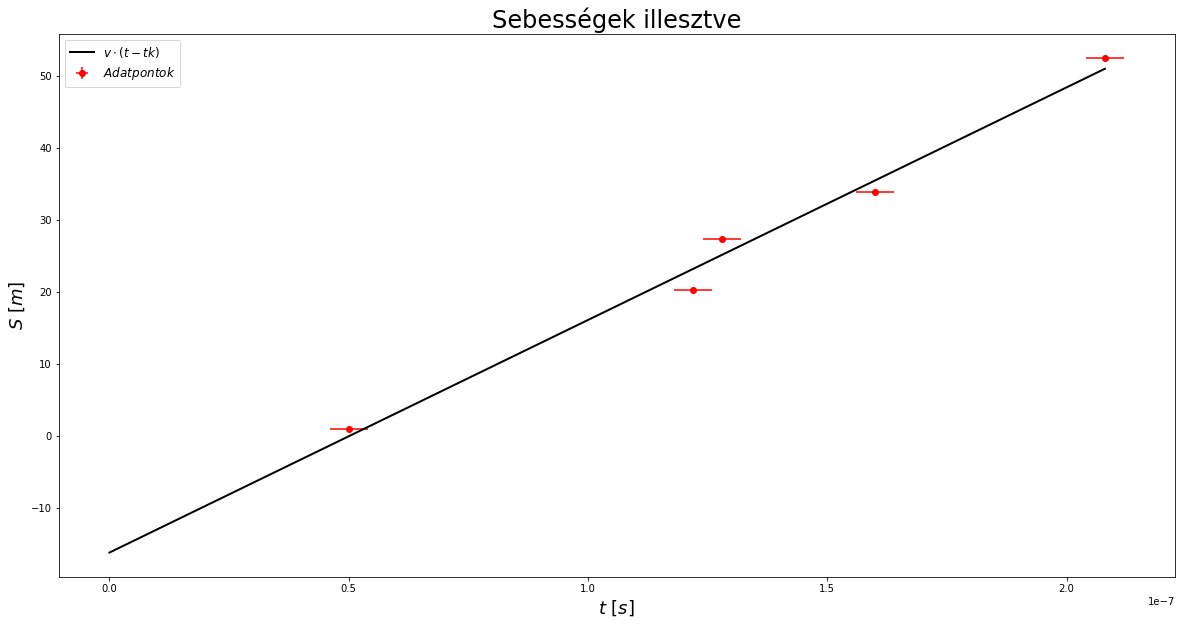

In [6]:
plt.figure(figsize=(20,10))
t2=np.linspace(0,t[-1],1000)
plt.errorbar(t,S,xerr=dt,yerr=dS,linestyle='',marker='o', color='red', label="$Adatpontok$")
plt.plot(t2,func(t2,*popt),label='$v \cdot (t-tk)$',color='black',linewidth=2) # az illesztéssel meghatározott gorbe
plt.xlabel("$t$ $[s]$", fontsize=18)
plt.ylabel("$S$ $[m]$", fontsize=18)
plt.title("Sebességek illesztve", fontsize=24)
plt.legend(loc='upper left',fontsize=12)

In [7]:
c0_mert=3.225e8
dc0_mert=2.161e7
tk=50*10**(-9)
dtk=6.6*10**(-9)

A becsült fénysebesség hibával: **3.225e+08 $\pm$ 2.161e+07 _m/s_**. 

Az elektronika becsült késleltetése: **50.0 $\pm$ 6.6 _ns_**.

## 3. feladat: Az üvegszál vizsgálata - 4 pont

Mérje meg a fényvezető kábelen a jel terjedési idejét, és ez alapján becsülje meg az üvegszálnak a törésmutatóját!

#### A kábel hossza 20,06 *m*, a mért jelterjedési idő **140_ns_** és hibája **4_ns_**.

Ez alapján a fényvezető szál becsült törésmutatója **adja meg a képletet is!**


In [8]:
l_uveg=20.06
dl_uveg=0 #nem ismert
t_uveg=140*10**(-9)-tk
dt_uveg=4*10**(-9)
v_uveg=l_uveg/t_uveg
dv_uveg=v_hibaterj(l_uveg,t_uveg,dl_uveg,dt_uveg)
n_uveg=c0/v_uveg #ez az üveg abszolút (vákumhoz viszonyított) törésmutatójának képlete
print("A fényvezető szál becsült törésmutatója: {}".format(n_uveg)) #az eredmény kb megfelel az irodalmi értéknek (1.45-1.7)

A fényvezető szál becsült törésmutatója: 1.3450648055832506


## 4. feladat: Jelterjedés vizsgálata koaxiális kábelben 

### 4.1. A propagációs idő mérése - 2 pont

Mérje meg az elektronikus jelek terjedési sebességét a koaxiális kábelen, és az alapján becsülje meg az
információ terjedési sebességét!

A kábel hossza 19,2 *m*, a mért propagációs idő **188 _ns_**.

Ez alapján a jelek terjedési sebessége a koaxiális kábelen **102127659 _m/s_**, ami a fény vákuumbeli segességének körülbelül **0.341** szerese.

In [9]:
l_koax=19.2
t_koax=188*10**(-9)
v_koax=l_koax/t_koax
arany_koax=v_koax/c0
print("A jelek terjedési sebessége a koaxiális kábelen {} m/s, ami a fény vákuumbeli sebességének körülbelül {} szorosa".format(v_koax,arany_koax))

A jelek terjedési sebessége a koaxiális kábelen 102127659.57446808 m/s, ami a fény vákuumbeli sebességének körülbelül 0.34065263367067405 szorosa


### 4.2. Visszaverődések vizsgálata koaxiális kábelben

Ha a koaxiális kábel csatlakozási pontjai nincsenek helyesen *lezárva*, akkor a rajta átvezetett jel formája torzul a visszaverődések miatt.
Mérje meg a vezeték bemenő oldalán a gerjesztés amplitudójának valamint a visszavert jel amplitudojának nagyságának arányát különböző lezáró ellenállásérték megválasztása mellett!
Ehhez kapcsolja a koaxiális kábel végére a mérőhelyen elhelyezett ellenállássort.

<img src="ellenallassor.svg" alt="R=10,33,51,220,510">

A lezáró ellenállás aktuális értékét úgy állíthatja be, hogy az ellenállások mellett található söntölő kapcsolókat (*jumperek*) lehúzza. Így a lehetséges ellenálláskombinációk széles skáláját elő tudja állítani.

#### 4.2.1. Adatfelvétel - 2 pont

|Mérés száma | Lezáró ellenállás [ $\Omega$ ] | Amplitúdóarány |
|---|---|---|
|1 |10 |-0.49 |
|2 |43 |-0.10 |
|3 | 94|0.31 |
|4 | 220|0.565 |
|5 |314 | 0.615|
|6 | 553|0.72 |
|7 | 824|0.77 |

#### 4.2.2. Adatok ábrázolása és illesztés - 4 pont

Az adatokból illesztés segítségével állapítsa meg a kábel hullámellenállását és a veszteségi tényezőt! 
*Javaslat:* az adatok ábrázolásánál érdemes a vízszintes tengelyt logaritmikusra választani.
Ábrázolja az adatokat és illesszen rájuk egy alkalmas fügvényt!

In [10]:
# adatrögzítés, ábrázolás és illesztés
R=np.array([10,43,94,220,314,553,824])
arany_koax=np.array([-0.49,-0.10,0.31,0.565,0.615,0.72,0.77])

def func2(R, V, Rh):
    return V * (R - Rh) / (R + Rh)

V=0.8
Rh=48
popt2,pcov2=curve_fit(func2,R,arany_koax,p0=[V,Rh]) # A p0-ba egyszeruen felsoroljuk a becsult ertekeket)
perr2 = np.sqrt(np.diag(pcov2))      # az illesztési paraméterek hibáinak meghatározása
print (['V','Rh'])
print (popt2)
print (perr2)

['V', 'Rh']
[ 0.84350246 46.62835981]
[0.02581849 2.97317663]


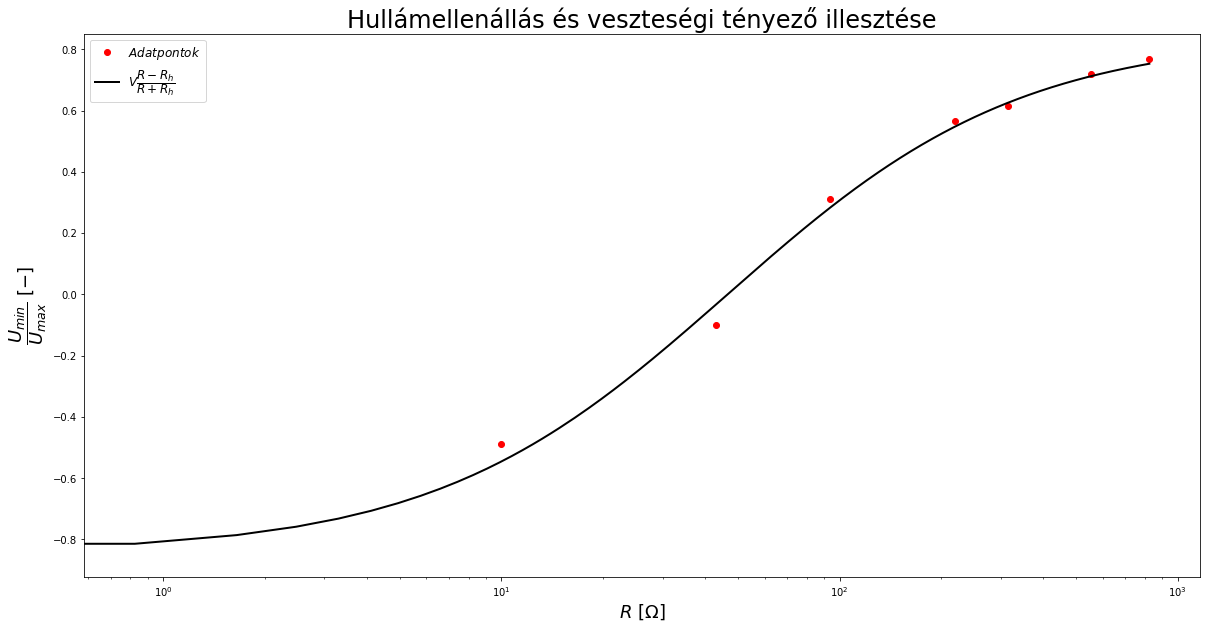

In [11]:
plt.figure(figsize=(20,10))
R2=np.linspace(0,R[-1],1000)
plt.plot(R,arany_koax,linestyle='',marker='o', color='red', label="$Adatpontok$")
plt.plot(R2,func2(R2,*popt2),label='$V \dfrac{R-R_h}{R+R_h}$',color='black',linewidth=2) # az illesztéssel meghatározott gorbe
plt.semilogx()
plt.xlabel("$R$ $[\Omega]$", fontsize=18)
plt.ylabel("$\dfrac{U_{min}}{U_{max}}$ $[-]$", fontsize=18)
plt.title("Hullámellenállás és veszteségi tényező illesztése", fontsize=24)
plt.legend(loc='upper left',fontsize=12)

#### 4.2.3. A modell alapján a közeg jellemzőinek meghatározása - 2 pont

Az illesztésnél használt modellfüggvény egyenlete **$\frac{U_{min}}{U_{max}}=V \frac{R-R_h}{R+R_h}$**, amely alapján a hullámellenállás **46.63 $\pm$ 2.97 _$\Omega$_** és a veszteségi tényező **0.84 $\pm$ 0.03** adódik.